<a href="https://colab.research.google.com/github/dhilligo/PHYS633S22/blob/main/Hilligoss_Dylan_10_SourceFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">10-SourceFunction</font>

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Matplotlin patches -- module that enables patches in plots
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable()

## 0. To execute: Below is the function that creates a gradiant of color between two curves, according to a certain function.

In [2]:
def rect(ax,x,y,w,h,c):
    #ax = plt.gca()
    polygon = plt.Rectangle((x,y),w,h,color=c)
    ax.add_patch(polygon)

def rainbow_fill_between(ax, X, Y1, Y2, colors=None, 
                         cmap=plt.get_cmap("Reds"),**kwargs):
    plt.plot(X,Y1,lw=0)  # Plot so the axes scale correctly

    dx = X[1]-X[0]
    N  = X.size

    #Pad a float or int to same size as x
    if (type(Y2) is float or type(Y2) is int):
        Y2 = np.array([Y2]*N)

    #No colors -- specify linear
    if colors is None:
        colors = []
        for n in range(N):
            colors.append(cmap(n/float(N)))
    #Varying only in x
    elif len(colors.shape) is 1:
        colors = cmap((colors-colors.min())
                      /(colors.max()-colors.min()))
    #Varying only in x and y
    else:
        cnp = np.array(colors)
        colors = np.empty([colors.shape[0],colors.shape[1],4])
        for i in range(colors.shape[0]):
            for j in range(colors.shape[1]):
                colors[i,j,:] = cmap((cnp[i,j]-cnp[:,:].min())
                                    /(cnp[:,:].max()-cnp[:,:].min()))

    colors = np.array(colors)

    #Create the patch objects
    for (color,x,y1,y2) in zip(colors,X,Y1,Y2):
        rect(ax,x,y2,dx,y1-y2,color,**kwargs)

## 1. First, let's consider a case where there is only emission.

* The lenght of the slab is 4 length units. 


### a. The properties of the material are constant $\rho(s)=\rho_o$ and $j(s)=j_o$.
* The product of the emission coefficient and the density give an intensity of 0.25 per unit of length. 
>**TODO**: start from $dI=...$ find an equation for $I(s)$ and show your work below. Add a curve for $I(s)$ in the graph below.

<img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/IMG_0484.jpeg?raw=true" width="300">

***Please look at top portion of page for the derivation to part 1a.***

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


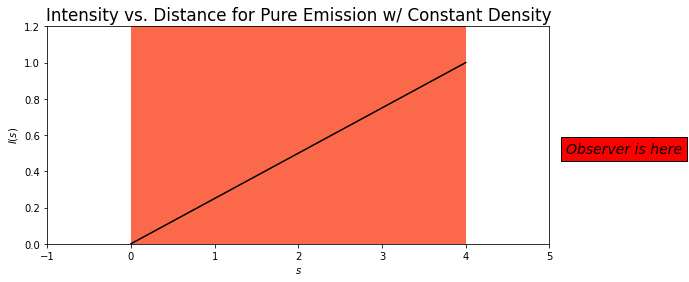

In [3]:
fig, ax = plt.subplots(1,1, figsize=(9,4))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_ylim(0, 1.2)
ax.set_xlim(-1,5)

# For the first graph, I want a patch with constant color
cmap = plt.cm.get_cmap('Reds') # get a red scale color map
rgba = cmap(0.5) # pick the color in the center of the color map
rec = mpatches.Rectangle( (0, 0), 4 , 1.2, fc=rgba) # Create a shaded rectangle
ax.add_patch(rec) # add the rectangle to the plot
ax.text(5.2, 0.5, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':5})

ax.set_xlabel('$s$')
ax.set_ylabel('$I(s)$')
ax.set_title("Intensity vs. Distance for Pure Emission w/ Constant Density")
#---------------------------------------
#---------------------------------------
# At home
I0=0
rho_j=0.25
dist=4
s_array=np.linspace(0,dist,100)

intensity=(I0+rho_j*(s_array-0))
ax.plot(s_array,intensity,label='Intensity',color='black')




> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

***ANSWER***: This plot is showing the intensity as a function of distance as light travels through a slab in the case of pure emission. As expected, when no absorption is present, we expect the intensity to grow as seen here. Since everything is constant ($\rho$ and $j$), the intensity should and does increase linearly.


### b. Now consider the emission inside a slab with density varying such that:

$$ \rho(s) = \rho_o \left( 1- \frac{s}{d} \right) $$
and for which the emiisivity is still constant $j(s)=j_o$.

>**TODO**:
>
> a. Find an expression for the intensity $I(s)$ everywhere in the slab and show your work below
>
> b. Analytically, find what the value of $\rho_o j_o$ has to be for the final intensity to be the same than that of #1a. Show your work below.
> <img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/IMG_0484.jpeg?raw=true" width="300">

>***Please look at bottom portion of page for derivation of part 1b.***

>c. Add a curve for $I(s)$ to the graph below. 

Text(0.5, 1.0, 'Intensity vs. Distance for Pure Emission w/ Varying Density')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


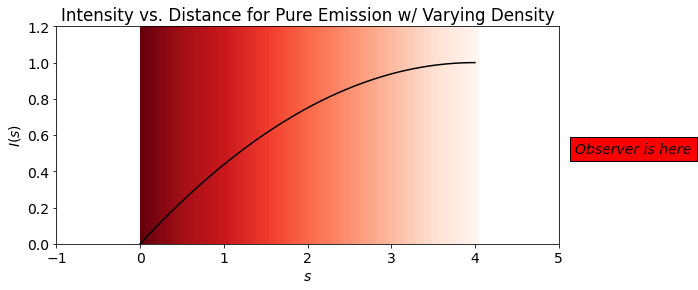

In [4]:
fig, ax = plt.subplots(1,1, figsize=(9,4))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'Times New Roman'})


ax.set_ylim(0, 1.2)
ax.set_xlim(-1,5)

# Create a patch with a gradient to illustrate
# the change in density
X=np.linspace(0,4,100)
Y1=np.copy(X)*0
Y2=np.copy(X)*0+4
g = 1.0-np.copy(X/4)
rainbow_fill_between(ax,X,Y1,Y2,colors=g)
ax.text(5.2, 0.5, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':5})

#---------------------------------------
#---------------------------------------
# At home
I0=0
j_rho0=0.5
dist1=4
s_array1=np.linspace(0,4,50)

intensity1=I0+j_rho0*(((2*dist1-s_array1-0)*(s_array1-0))/(2*dist1))

ax.plot(s_array1,intensity1,color='black')
ax.set_xlabel('$s$')
ax.set_ylabel('$I(s)$')
ax.set_title("Intensity vs. Distance for Pure Emission w/ Varying Density")


**TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

***ANSWER***: Now for the case of pure emission but with a varying density, we see that the intensity curve is no longer constantly increasing. At larger distances, the density increases slower. Since intensity depends on density, we expect (and ultimately see as plotted above) that at larger distances when the density is lower, the intensity will increase at a slower rate.

## 2. Now let's look at the case where there is both absorption and emission. 

In class, we found the 'formal solution' of RT to be:
$$I(\tau) ~~=~~ ~ I_o\mathrm{e}^{\tau-\tau_o} ~+~ \int_{\tau'=\tau_o}^{\tau'=\tau} S(\tau')~ \mathrm{e}^{\tau-\tau'}d\tau'$$

### a. Constant source function ($S(\tau)=So$)

In this case, the , the formal solution can be written as:
$$I(s) ~~=~~ ~ I_o\mathrm{e}^{\tau(s)-\tau_o} ~+~ S_o\left[1-\mathrm{e}^{\tau(s)-\tau_o}\right]$$

Here, let's consider that everything else is also constant: $\rho(s)=\rho_o$ and $j(s)=j_o$.

Numerical values are defined in the code below. 

>**TODO**:
>
> 1. Find an expression for $\tau(s)-\tau_o$. Show your work.
> 2. In the graph below, add a curve for the first term of the $I(s)$ equation. Make sure to add a legend.
> 3. In the graph below, add a curve for the second term of the $I(s)$ equation. Make sure to add a legend.
> 4. In the graph below, add a curve for $I(s)$ itself. Make sure to add a legend.
>
> Note: I have shown what the graph should look like in the class slides :)

<img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/IMG_0485.jpeg?raw=true" width="300">

***Please look at top portion of page for derivation of part 2a.***

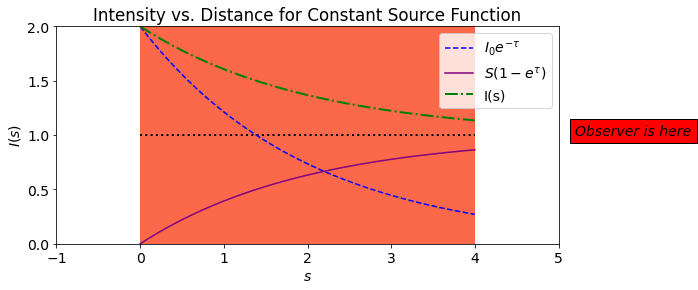

In [5]:
fig, ax = plt.subplots(1,1, figsize=(9,4))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_ylim(0, 2)
ax.set_xlim(-1,5)
    
# For the first graph, I want a patch with constant color
cmap = plt.cm.get_cmap('Reds') # get a red scale color map
rgba = cmap(0.5) # pick the color in the center of the color map
#rec = mpatches.Rectangle( (0, 0), 4 , 2, fc=rgba) # Create a shaded rectangle
ax.add_patch(mpatches.Rectangle( (0, 0), 4 , 2, fc=rgba)) # add the rectangle to the plot
ax.text(5.2, 1, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':5})

ax.set_xlabel('$s$')

#---------------------------------------------------------
# Here are the values for already defined for this problem
    
Io = 2
j_rho = 0.5
kappa_rho = 0.5
S = j_rho / kappa_rho
d = 4

ss = np.linspace(0,4, 50)

# Curve for the source function value
source = np.array( [S]*ss.size )
ax.plot(ss, source, ls='dotted', c='k', lw=2)
#---------------------------------------
#---------------------------------------


# Optical depth

tau=-kappa_rho*(ss-0)

# First term (if there was no emission)

term1=Io*np.exp(tau)
ax.plot(ss,term1,ls='--',color='blue',label=r'$I_0 e^{-\tau}$')

# Second term (if there was no initial intensity)

term2=S*(1-np.exp(tau))
ax.plot(ss,term2,ls='-',color='purple',label=r'$S(1-e^{\tau})$')

# Intensity

intensity=term1+term2
ax.plot(ss,intensity,color='green', label='I(s)',ls='-.',lw=2)
ax.set_xlabel('$s$')
ax.set_ylabel('$I(s)$')
ax.set_title("Intensity vs. Distance for Constant Source Function")
ax.legend(loc='best')

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

***ANSWER***: The above plot shows the intensity as a function of distance for the case with both emission and absorption with a constant source function, density, and opacity. This figure plots each term in the intensity solution overplotted with the source function. As you can see, the first term is decreasing exponentially while the second term is increasing exponentially. When you add these two terms to make the final intensity solution, we can see that the overall intensity is decreasing but keeps a value greater than that of the source function.

### b. Constant source function ($S(\tau)=So$) but linearly decreasing density

 > **TODO**: Re-do what we did in #2a, assuming this time that the density is decreasing linearly such that:
$$ \rho(s) = \rho_o \left( 1- \frac{s}{d} \right), $$ where $d$ is the length of the slab.
>
>Note: You can directly use some of the results from your previous notebook (e.g. for the optical depth).  

<img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/IMG_0485.jpeg?raw=true" width="300">

***Please look at bottom portion of page for the derivation of part 2b.***

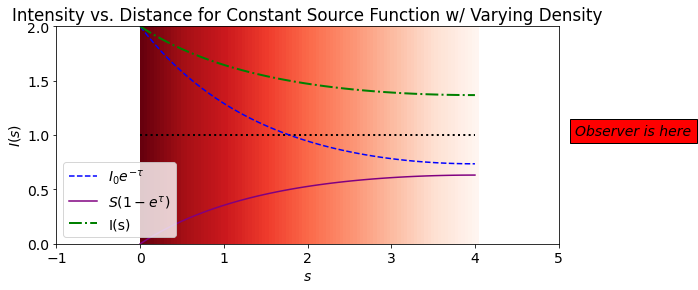

In [6]:
fig, ax = plt.subplots(1,1, figsize=(9,4))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_ylim(0, 2)
ax.set_xlim(-1,5)


# Create a patch with a gradient to illustrate
# the change in density
X=np.linspace(0,4,100)
Y1=np.copy(X)*0
Y2=np.copy(X)*0+4
g = 1.0-np.copy(X/4)
rainbow_fill_between(ax,X,Y1,Y2,colors=g)

ax.text(5.2, 1, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':5})

ax.set_xlabel('$s$')

#---------------------------------------------------------
# Here are the values for already defined for this problem
    
Io = 2
j_rho = 0.5
kappa_rho = 0.5
S = j_rho / kappa_rho
d = 4

ss = np.linspace(0,4, 50)

# Curve for the source function value
source = np.array( [S]*ss.size )
ax.plot(ss, source, ls='dotted', c='k', lw=2)
#---------------------------------------
#---------------------------------------

tau1=-kappa_rho*(((2*d-ss-0)*(ss-0))/(2*d))

#First term

term_a=Io*np.exp(tau1)
ax.plot(ss,term_a,ls='--',color='blue',label=r'$I_0 e^{-\tau}$')

#Second term

term_b=S*(1-np.exp(tau1))
ax.plot(ss,term_b,ls='-',color='purple',label=r'$S(1-e^{\tau})$')

#Intensity

intensity1=term_a+term_b
ax.plot(ss,intensity1,color='green', label='I(s)',ls='-.',lw=2)
ax.set_xlabel('$s$')
ax.set_ylabel('$I(s)$')
ax.set_title("Intensity vs. Distance for Constant Source Function w/ Varying Density")
ax.legend(loc='best')


**TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

***ANSWER***: In this plot, similar to the one above, I plot the intensity as a function of distance for a constant source function and opacity. But this time, we have a varying density rather than a constant one. Each line corresponds to one of the terms in the solution to the intensity equation. Notice in this case that the first and second terms have smaller slopes. Since the density is varying (which optical depth is explicitly dependent on), the first term will have a smaller value at larger distances. The second term will remain smaller than the case of constant density. The overall intensity remains greater than the value of the source function and with a higher value than in the previous case. This is because with less intensity at larger distances, less intensity is lost as it passes through the slab. However, perhaps the key difference to note is how the first and second term now seem to converge with each other at a value slightly above 0.5, which was not the case in the previous example.

## 3. Case when the source function is not constant.

Let's assume that the density and opacity in the slab are constant, such that $\kappa_o\rho_o=2.0$ per unit length. 

The source function is however a function of $\tau$ such that:
$$ S(\tau) = S_0 + S_1\tau$$
where $S_0=0.5$ intensity unit, and $S_1=1.3$ intensity units per optical depth unit. 

There is no intial intensity entering the slab so $I_o = 0$.

Prepare your code such that you can vary the values of the parameters in the equations above.

### a. Find an expression for $I(\tau)$.
>**TODO**: In this case, you cannot use the expression we found for the constant source function. You will have to start back at the expression for the formal solution itself. Show your work below

<img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/IMG_0486.jpeg?raw=true" width="300">
<img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/IMG_0487.jpeg?raw=true" width="300">

### b. On your graph add a curve for:
>**TODO**:
>1. the optical depth $\tau$ as a function of $s$.
>2. the source function $S$ as a function of $s$.
>3. the intensity $I$ as a function of $s$. 
>
>4. Concentrating on the side of your graph where the light exits the slab, estimate the optical depth at which the value of the source function is equal to the value of the intensity emerging from the slab. 

<font color="red">***ANSWER***: The optical depth has a value around 1.0 when the source function is equal to the value of the intensity emerging from the slab. This estimate was made by relating the intensity and source function curves when the intensity curve exits the slab, then finding where the corresponding optical depth coincides.  

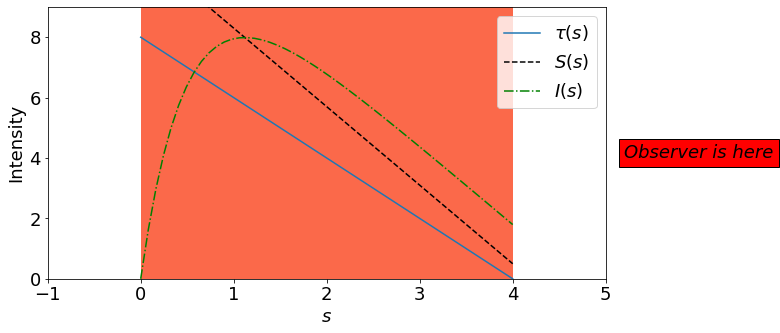

In [30]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_ylim(0, 9)
ax.set_xlim(-1,5)

# For the first graph, I want a patch with constant color
cmap = plt.cm.get_cmap('Reds') # get a red scale color map
rgba = cmap(0.5) # pick the color in the center of the color map
rec = mpatches.Rectangle( (0, 0), 4 , 9, fc=rgba) # Create a shaded rectangle
ax.add_patch(rec) # add the rectangle to the plot
ax.text(5.2, 4, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':5})

ax.set_xlabel('$s$')
ax.set_ylabel("Intensity")
# Values to use

d = 4

Io = 0
kappa_rho = 2.0
tau0=kappa_rho*d
S0 = 0.5
S1 = 1.3

ss = np.linspace(0,4, 50)

#---------------------------------------
#---------------------------------------
# At home
tau2=kappa_rho*((0+d)-ss)
ax.plot(ss,tau2,label=r'$\tau(s)$')

sourcefunction=S0+(S1*tau2)
ax.plot(ss,sourcefunction,label=r'$S(s)$',color='black',ls='--')

intensity2=Io*np.exp(tau2-tau0)+S0*(1-np.exp(tau2-tau0))+S1*(1+(tau2)-np.exp(tau2-tau0)*(1+tau0))
ax.plot(ss,intensity2,color='green',ls='-.',label=r'$I(s)$')
ax.legend(loc='best')


> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

***ANSWER***: The above plot shows the intensity as a function of distance for a non-constant source function. Specifically, I plot the optical depth, source function, and intensity. As one moves to the right through the slab, both the optical depth and source function will decrease in value. In regards to the intensity, it begins by sharply increasing. The intensity does this because it is trying to mimic the value of the source function. This is why it begins to fall off as one moves to the right in the slab. Since the source function is decreasing, the intensity must also decrease if it wants to converge with it. However, there is not enough physical space for the intensity to fully converge with the source function.